# Data Science Nigeria 2019 Challenge 1 Insurance Prediction

Recently, there has been an increase in the number of building collapse in Lagos and major cities in Nigeria. Olusola Insurance Company offers a building insurance policy that protects buildings against damages that could be caused by a fire or vandalism, by a flood or storm.

You have been appointed as the Lead Data Analyst to build a predictive model to determine if a building will have an insurance claim during a certain period or not. You will have to predict the probability of having at least one claim over the insured period of the building.

The model will be based on the building characteristics. The target variable, **Claim**, is a:

 **1 if the building has at least a claim over the insured period.**
 
 **0 if the building doesn’t have a claim over the insured period.**

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import datetime as dt                           #convert date formats
from scipy import stats                         #statistical analysis
from IPython.display import display 
import matplotlib.pyplot as plt
%matplotlib inline
#
import seaborn as sns
sns.set()
import gc                                       # memory management

In [2]:
#Setting styles and aesthetics
pd.set_option('display.max_columns', 200)
pd.options.display.max_rows =30
pd.options.display.float_format = '{:,.2f}'.format

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (18, 8)

# Graphics in SVG format are more sharp and legible
#%config InlineBackend.figure_format = 'svg'

In [3]:
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')
#copies
trn = train.copy()
tst = test.copy()

In [4]:
# Check The Shape Of The Data Loaded
print('Train data shape: {} Rows, {} Columns'.format(*train.shape))
print('Test data shape: {} Rows, {} Columns'.format(*test.shape))

Train data shape: 7160 Rows, 14 Columns
Test data shape: 3069 Rows, 13 Columns


In [5]:
# Print First Few Rows Of The Data
display("Train data")
display(train.head(3))
display(train.tail(3))
display("test data")
display(test.head(3))
display(train.tail(3))

'Train data'

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.00,0,N,V,V,U,290.00,1,"1,960.00",.,1053,0
1,H2037,2015,1.00,0,V,N,O,R,490.00,1,"1,850.00",4,1053,0
2,H3802,2014,1.00,0,N,V,V,U,595.00,1,"1,960.00",.,1053,0


,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
7157,H6204,2016,0.04,0,V,V,V,U,nan,1,"1,992.00",.,NaN,0
7158,H6537,2013,1.00,0,V,V,V,U,nan,1,"1,972.00",.,NaN,0
7159,H7470,2014,1.00,0,V,V,V,U,nan,1,"2,004.00",.,NaN,0


'test data'

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1.00,0,V,N,O,R,300.00,1,"1,960.00",3,3310
1,H11921,2016,1.00,0,V,N,O,R,300.00,1,"1,960.00",3,3310
2,H9805,2013,0.37,0,V,V,V,U,790.00,1,"1,960.00",.,3310


,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
7157,H6204,2016,0.04,0,V,V,V,U,nan,1,"1,992.00",.,NaN,0
7158,H6537,2013,1.00,0,V,V,V,U,nan,1,"1,972.00",.,NaN,0
7159,H7470,2014,1.00,0,V,V,V,U,nan,1,"2,004.00",.,NaN,0


### Data Exploration

In [6]:
#column/variable names
display("Train data")
display(train.columns)
display("Test data")
display(test.columns)

'Train data'

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code', 'Claim'],
      dtype='object')

'Test data'

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code'],
      dtype='object')

In [7]:
#data types of columns/variables
# Number of each type of column
display("Train data")
display(train.dtypes.value_counts())
display("test data")
display(test.dtypes.value_counts())

'Train data'

object     7
int64      4
float64    3
dtype: int64

'test data'

object     7
int64      3
float64    3
dtype: int64

### Structure of the data

In [8]:
#train data pandas profiling
from pandas_profiling import ProfileReport
profile = ProfileReport(train)
profile.to_file(output_file='Train_Profiling_Report.html')
#
#test data pandas profiling
profile = ProfileReport(test)
profile.to_file(output_file='Test_Profiling.html')

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Merge Datasets

Tag the train and test data separately with a set column/variable

In [9]:
train['set'] = 'train'
test['set'] = 'test'

In [10]:
#merge the two sets of data for data analysis and visualization
data = pd.concat([train,test])
display(data.head(3))
display(data.tail(3))

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim,set
0,H14663,2013,1.00,0,N,V,V,U,290.00,1,"1,960.00",.,1053,0.00,train
1,H2037,2015,1.00,0,V,N,O,R,490.00,1,"1,850.00",4,1053,0.00,train
2,H3802,2014,1.00,0,N,V,V,U,595.00,1,"1,960.00",.,1053,0.00,train


,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim,set
3066,H11721,2012,1.00,0,V,V,V,U,nan,2,"1,993.00",.,NaN,nan,test
3067,H12408,2013,1.00,0,V,V,V,U,nan,1,"1,800.00",.,NaN,nan,test
3068,H9021,2012,1.00,0,V,V,V,U,nan,2,"1,950.00",.,NaN,nan,test


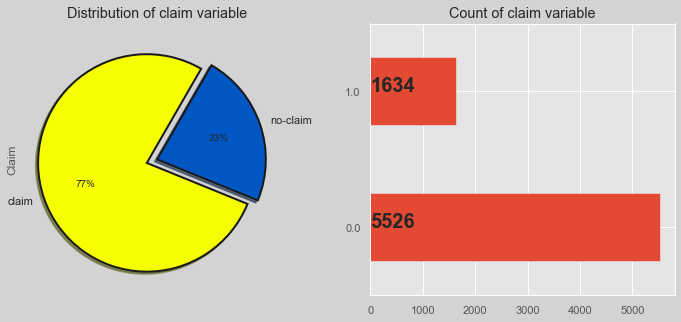

In [11]:
# Distribution of the target variable
fig = plt.figure(figsize=(12, 5))
plt.subplot(121)
data[data['set'] == "train"]["Claim"].value_counts().plot.pie(autopct = "%1.0f%%",  colors = sns.color_palette("prism",7),
                                                                                    startangle = 60,
                                                                                    labels=["claim","no-claim"],
                                                                                    wedgeprops={"linewidth":2,"edgecolor":"k"},
                                                                                    explode=[.1,0],shadow =True)
plt.title("Distribution of claim variable")

plt.subplot(122)
ax = data[data['set'] == "train"]["Claim"].value_counts().plot(kind="barh")

for i,j in enumerate(data[data['set'] == "train"]["Claim"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize=20)

plt.title("Count of claim variable")
#ax.set_facecolor("k")
fig.set_facecolor("lightgrey")
plt.show()

Percentage of missing values in the data

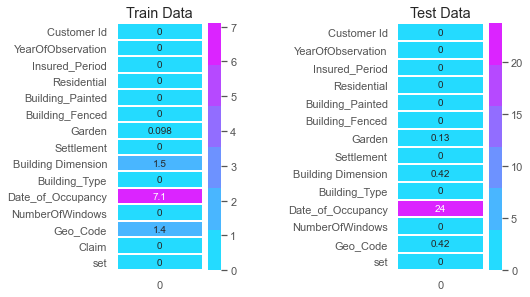

In [12]:
plt.figure(figsize=(12,10))

plt.subplot(231)
sns.heatmap(pd.DataFrame(train.isnull().sum()/train.shape[0]*100),annot=True,
            cmap=sns.color_palette("cool"),linewidth=1,linecolor="white")
plt.title("Train Data")

plt.subplot(232)
sns.heatmap(pd.DataFrame(test.isnull().sum()/test.shape[0]*100),annot=True,
            cmap=sns.color_palette("cool"),linewidth=1,linecolor="white")
plt.title("Test Data")

plt.subplots_adjust(wspace = 1.6)

## Feature Engineering

In [13]:
data.drop_duplicates(subset=data.columns, keep='last', inplace=True)

In [14]:
#renaming columns
data.columns = data.columns.str.strip().str.lower().str.replace(' ','_')

In [15]:
data.head(3)

,customer_id,yearofobservation,insured_period,residential,building_painted,building_fenced,garden,settlement,building_dimension,building_type,date_of_occupancy,numberofwindows,geo_code,claim,set
0,H14663,2013,1.00,0,N,V,V,U,290.00,1,"1,960.00",.,1053,0.00,train
1,H2037,2015,1.00,0,V,N,O,R,490.00,1,"1,850.00",4,1053,0.00,train
2,H3802,2014,1.00,0,N,V,V,U,595.00,1,"1,960.00",.,1053,0.00,train


In [16]:
data.dtypes

customer_id            object
yearofobservation       int64
insured_period        float64
residential             int64
building_painted       object
building_fenced        object
garden                 object
settlement             object
building_dimension    float64
building_type           int64
date_of_occupancy     float64
numberofwindows        object
geo_code               object
claim                 float64
set                    object
dtype: object

### Numerical/Continuous Variables

In [17]:
#define a function for treating outliers
def treat_outlier(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    print('First quantile: ', Q1)
    print('Third quantile: ', Q3)
    print('IQR: ', IQR)
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    print('Lower bound: ', lower_bound, 'Upper bound: ', upper_bound)

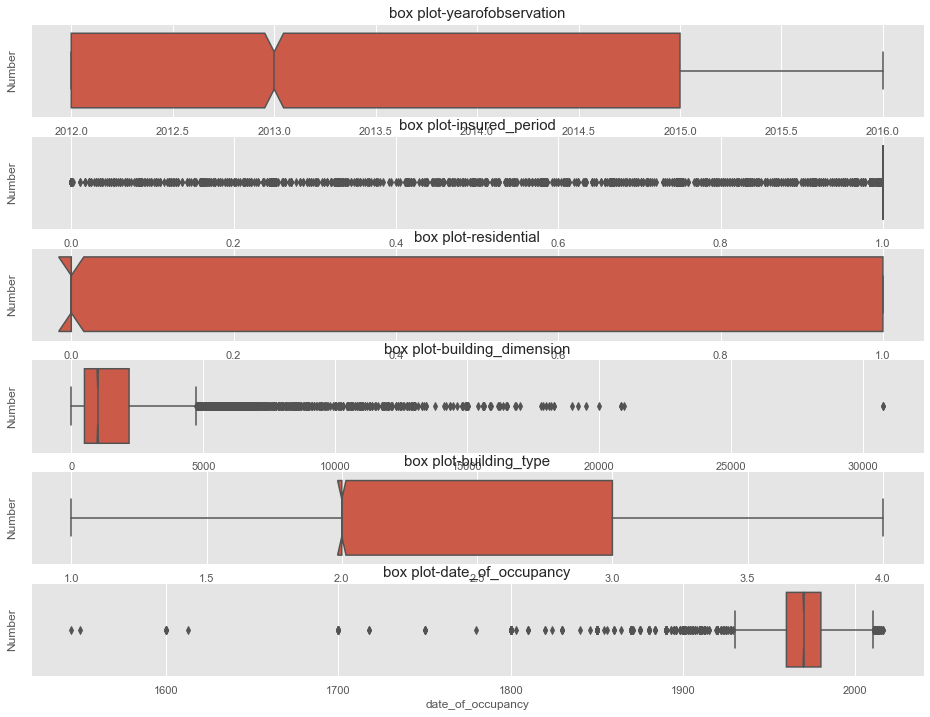

In [18]:
#checking for outliers using box plot
col_names = ['yearofobservation', 'insured_period', 'residential', 'building_dimension', 'building_type', 'date_of_occupancy']
fig, ax=plt.subplots(len(col_names), figsize=(16,12))
for i, col_val in enumerate(col_names):
    sns.boxplot(data[col_val], notch= True, ax=ax[i])
    ax[i].set_title ('box plot-'+ col_val, fontsize= 15)
    ax[i].set_xlabel(col_val, fontsize= 12)
    ax[i].set_ylabel('Number', fontsize= 12)

plt.show()  

### 1. Year of Observation

In [19]:
data['yearofobservation'].unique()

array([2013, 2015, 2014, 2012, 2016], dtype=int64)

In [20]:
data['yearofobservation'] = pd.to_datetime(data['yearofobservation'], format='%Y', yearfirst=True)

### 2. Insured Period

In [21]:
#Full year insurance, Policy Duration = 1; 6 months = 0.5
data['insured_period_round'] = data['insured_period'].round(1)
data.insured_period_round.value_counts()

1.00    8650
0.00     233
0.70     215
0.20     196
0.50     188
0.80     158
0.90     154
0.30     122
0.10     120
0.60     100
0.40      93
Name: insured_period_round, dtype: int64

In [22]:
def month(x):
    if x == 0.0:
        return 1
    elif x == 0.1:
        return 2
    elif x == 0.2:
        return 3
    elif x == 0.3:
        return 4
    elif x == 0.4:
        return 5
    elif x == 0.5:
        return 6
    elif x == 0.6:
        return 7
    elif x == 0.7:
        return 8
    elif x == 0.8:
        return 9
    elif x == 0.9:
        return 10
    else:
        return 12

In [23]:
data['insured_period_round'] = data['insured_period_round'].apply(month)
#categorize insured period quarterly
data['quarter'] = pd.cut(data.insured_period_round, [0,3,6,9,12], labels = ['Q1','Q2', 'Q3', 'Q4'])
data.head(3)

,customer_id,yearofobservation,insured_period,residential,building_painted,building_fenced,garden,settlement,building_dimension,building_type,date_of_occupancy,numberofwindows,geo_code,claim,set,insured_period_round,quarter
0,H14663,2013-01-01,1.00,0,N,V,V,U,290.00,1,"1,960.00",.,1053,0.00,train,12,Q4
1,H2037,2015-01-01,1.00,0,V,N,O,R,490.00,1,"1,850.00",4,1053,0.00,train,12,Q4
2,H3802,2014-01-01,1.00,0,N,V,V,U,595.00,1,"1,960.00",.,1053,0.00,train,12,Q4


### 3. Building Dimension

In [24]:
data['building_dimension'].fillna(round(data['building_dimension'].mean(), 2), inplace=True)
print('Null values:', data['building_dimension'].isnull().sum())
treat_outlier(data, 'building_dimension')

Null values: 0
First quantile:  510.0
Third quantile:  2167.0
IQR:  1657.0
Lower bound:  -1975.5 Upper bound:  4652.5


In [25]:
data = data[(data['building_dimension'] > -1975.5) & (data['building_dimension'] < 4652.5)]

In [26]:
#scale the building dimension variable
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_dim = scaler.fit_transform(data[['building_dimension']]) #numpy array

In [27]:
data = pd.concat([data.reset_index(drop = True), pd.DataFrame(scaled_dim, columns = ['scaled_building_dim'])], axis = 1)
data.head(3)

,customer_id,yearofobservation,insured_period,residential,building_painted,building_fenced,garden,settlement,building_dimension,building_type,date_of_occupancy,numberofwindows,geo_code,claim,set,insured_period_round,quarter,scaled_building_dim
0,H14663,2013-01-01,1.00,0,N,V,V,U,290.00,1,"1,960.00",.,1053,0.00,train,12,Q4,0.06
1,H2037,2015-01-01,1.00,0,V,N,O,R,490.00,1,"1,850.00",4,1053,0.00,train,12,Q4,0.11
2,H3802,2014-01-01,1.00,0,N,V,V,U,595.00,1,"1,960.00",.,1053,0.00,train,12,Q4,0.13


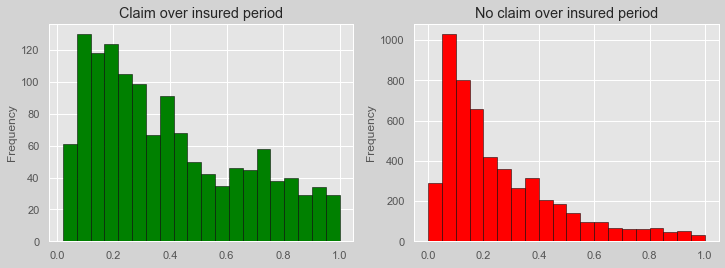

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
#
data[data['claim'] == 1].scaled_building_dim.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='green')
ax[0].set_title('Claim over insured period')
#
data[data['claim'] == 0].scaled_building_dim.plot.hist(ax=ax[1], color='red', bins=20, edgecolor='black')
ax[1].set_title('No claim over insured period')
#
fig.set_facecolor("lightgrey")
plt.show()

### 4. Residential

In [29]:
data['residential'].unique()

array([0, 1], dtype=int64)

### 5. Building Type

In [30]:
data['building_type'].unique()

array([1, 2, 4, 3], dtype=int64)

### 6. Date of Occupancy

In [31]:
data['date_of_occupancy'].fillna(data['date_of_occupancy'].median(), inplace=True)
print('Null values:', data['date_of_occupancy'].isnull().sum())
treat_outlier(data, 'date_of_occupancy')

Null values: 0
First quantile:  1960.0
Third quantile:  1980.0
IQR:  20.0
Lower bound:  1930.0 Upper bound:  2010.0


In [32]:
data[(data['date_of_occupancy'] > 1930.0) & (data['date_of_occupancy'] < 2010.0)]['date_of_occupancy'].unique().astype('int')

array([1960, 1980, 1988, 2007, 1970, 1950, 1940, 1982, 1972, 1971, 1995,
       2006, 1999, 1985, 1965, 1981, 1975, 1997, 2003, 1990, 1973, 1991,
       1974, 1967, 1957, 1978, 2009, 1949, 1951, 2008, 2000, 1962, 1956,
       1983, 1954, 1968, 2004, 1936, 1953, 1979, 1946, 1955, 2001, 1976,
       1961, 1964, 1984, 1958, 2002, 1986, 1993, 1992, 1977, 2005, 1945,
       1942, 1939, 1934, 1998, 1987, 1938, 1959, 1966, 1989, 1996, 1963,
       1948, 1952, 1969, 1994, 1937, 1931, 1935, 1947])

In [33]:
data = data[(data['date_of_occupancy'] > 1930.0) & (data['date_of_occupancy'] < 2010.0)]
data['date_of_occupancy'] = pd.to_datetime(data['date_of_occupancy'].astype('int'), format='%Y', yearfirst=True)
data = data.reset_index(drop = True)

In [34]:
#number of active years
data['year_of_observation'] = data['yearofobservation'].dt.year
data['year_of_occupancy'] = data['date_of_occupancy'].dt.year
#
data['years_active'] = data['yearofobservation'].dt.year - data['date_of_occupancy'].dt.year

In [35]:
data['years_active'].unique()

array([53, 54, 32, 24, 52,  5, 26, 27, 45, 46, 66, 42, 36, 76, 62, 31, 56,
       44, 34, 25, 33, 35, 43, 19,  6,  7, 28, 16, 55, 30, 41, 51, 64, 72,
       15, 13, 23, 48, 75, 21, 39, 50, 73, 63, 47, 59,  3,  4, 37, 40, 65,
       58, 38, 10, 60, 22,  9, 11, 80, 61, 74, 70, 20, 29, 14, 12, 17, 57,
       18, 69, 71, 49, 67, 82, 78,  8, 68, 77, 79, 81], dtype=int64)

In [36]:
#encode the year columns/variables by their frequency codes
int_cols = ['year_of_observation', 'year_of_occupancy', 'years_active']
#
for col in int_cols:
    freq = data[col].value_counts().to_dict()
    data[col + '_freq_encode'] = data[col].map(freq)

In [37]:
#categorize (Coarse classify) years active in terms of decades ie D1(3,12]->1-12, D2(12,22]->13-22, ...
data['decades_active'] = pd.cut(data.years_active, [3,12,22,32,42,52,62,72,82], 
                             labels = ['D1','D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8'])

### 7. Number of Windows

In [38]:
data['numberofwindows'].unique()

array(['   .', '3', '4', '5', '2', '6', '>=10', '9', '7', '8', '1'],
      dtype=object)

In [39]:
#bin the number of windows to three categories (0-4), (5-9), (10>=)
#data['numberofwindows'] = data['numberofwindows'].str.replace({'   .': '0-4',
#                                                               '2': '0-4',
#                                                              '1': '0-4',
#                                                               '3': '0-4',
#                                                               '4': '0-4',
#                                                               '5': '5-9',
#                                                               '6': '5-9',
#                                                               '7': '5-9',
#                                                               '8': '5-9',
#                                                               '9': '5-9'})
#data['numberofwindows'] = [['0-4', '5-9', '>=10']]
#display(data.head(3))

## Categorical variables

In [40]:
data.columns

Index(['customer_id', 'yearofobservation', 'insured_period', 'residential',
       'building_painted', 'building_fenced', 'garden', 'settlement',
       'building_dimension', 'building_type', 'date_of_occupancy',
       'numberofwindows', 'geo_code', 'claim', 'set', 'insured_period_round',
       'quarter', 'scaled_building_dim', 'year_of_observation',
       'year_of_occupancy', 'years_active', 'year_of_observation_freq_encode',
       'year_of_occupancy_freq_encode', 'years_active_freq_encode',
       'decades_active'],
      dtype='object')

Creating dummy variables

In [41]:
# function to automate categorical plots
def cat_plot(var, x_label_rotation=0):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    fig.set_size_inches(20,5)
    #
    sns.countplot(x=var, data=data[data['claim'] == 1])
    ax[0].set_xlabel(var, fontsize=20)
    ax[0].set_ylabel('value counts', fontsize=20)
    ax[0].set_title('Claim over insured period for ' + var, fontsize=20)
    ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=x_label_rotation)
    #
    sns.countplot(x=var, data=data[data['claim'] == 0])
    ax[1].set_xlabel(var, fontsize=20)
    ax[1].set_ylabel('value counts', fontsize=20)
    ax[1].set_title('No claim over insured period for ' + var, fontsize=20)
    ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=x_label_rotation)

### 1. Building Painted

In [42]:
data.building_painted.value_counts()

V    5143
N    3003
Name: building_painted, dtype: int64

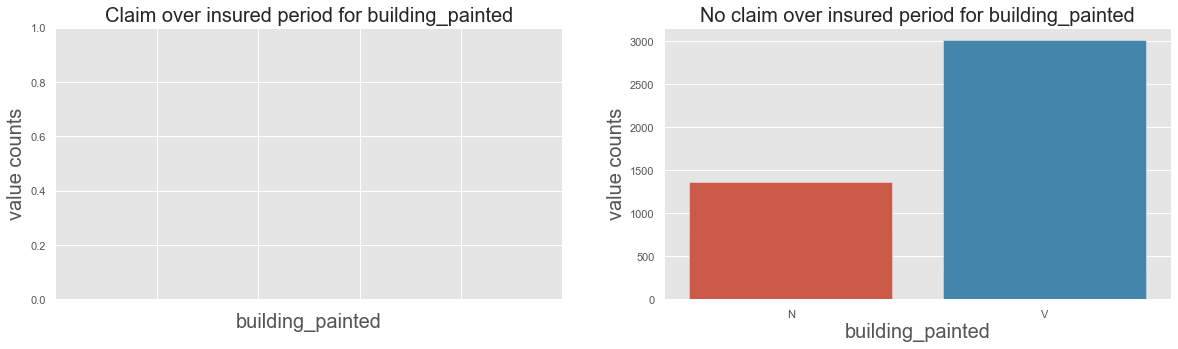

In [43]:
cat_plot('building_painted')

In [44]:
data.groupby(['building_painted'])['claim'].value_counts()

building_painted  claim
N                 0.00     1363
                  1.00      327
V                 0.00     3010
                  1.00      772
Name: claim, dtype: int64

In [45]:
data['building_painted'] = data.building_painted.replace({'N': 1, 'V': 0})

### 2. Building Fenced

In [46]:
data.building_fenced.value_counts()

V    5430
N    2716
Name: building_fenced, dtype: int64

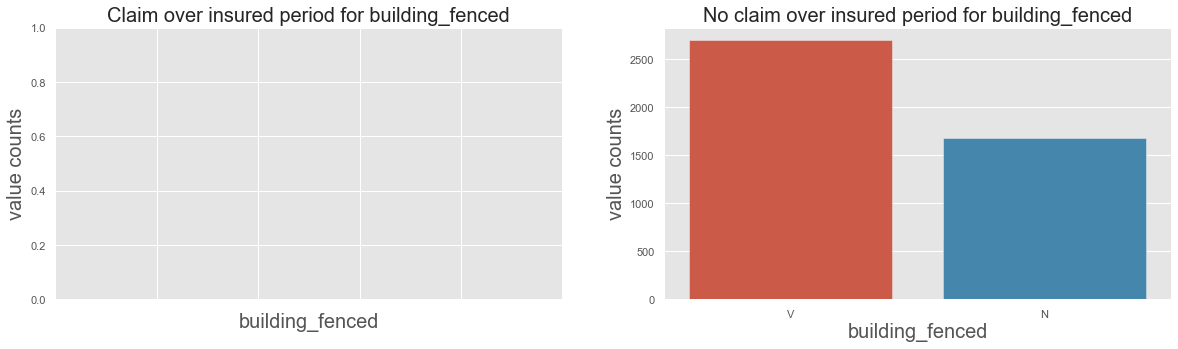

In [47]:
cat_plot('building_fenced')

In [48]:
data.groupby(['building_fenced'])['claim'].value_counts()

building_fenced  claim
N                0.00     1678
                 1.00      472
V                0.00     2695
                 1.00      627
Name: claim, dtype: int64

In [49]:
data['building_fenced'] = data.building_fenced.replace({'N': 1, 'V': 0})

### 3. Garden

In [50]:
data.garden.value_counts()

V    5429
O    2708
Name: garden, dtype: int64

In [51]:
data.groupby(['garden'])['claim'].value_counts()

garden  claim
O       0.00     1674
        1.00      472
V       0.00     2695
        1.00      626
Name: claim, dtype: int64

In [52]:
data.garden.isnull().sum()

9

In [53]:
data['garden'].fillna(0, inplace=True)

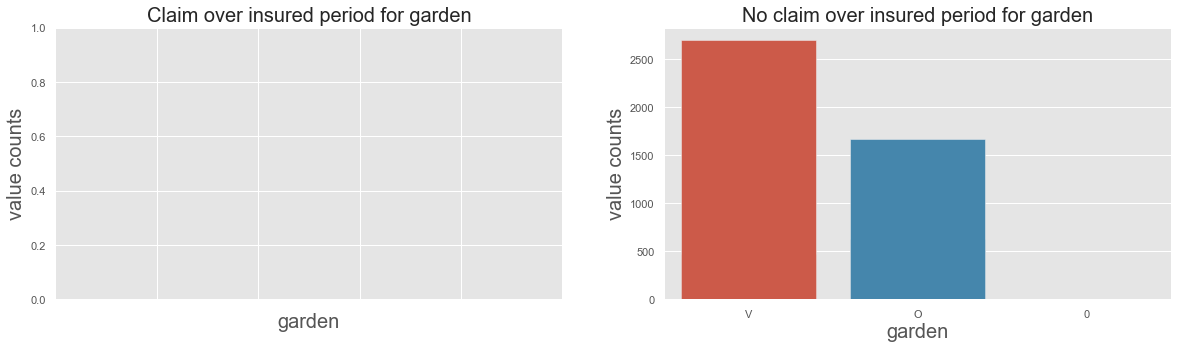

In [54]:
cat_plot('garden')

In [55]:
data['garden'] = data.garden.replace({'V': 1, 'O': 0})

### 4. Settlement

In [56]:
data.settlement.value_counts()

U    5428
R    2718
Name: settlement, dtype: int64

In [57]:
data.groupby(['settlement'])['claim'].value_counts()

settlement  claim
R           0.00     1679
            1.00      473
U           0.00     2694
            1.00      626
Name: claim, dtype: int64

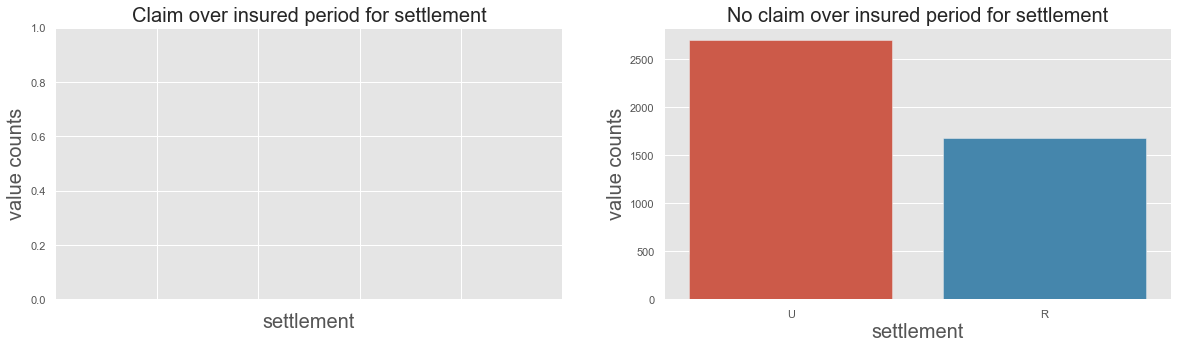

In [58]:
cat_plot('settlement')

In [59]:
data['settlement'] = data.settlement.replace({'R': 1, 'U': 0})

### Dummify categorial variables

In [60]:
#Dummify the variables
data = pd.get_dummies(data, columns=['building_type', 'quarter', 'decades_active'], 
                      drop_first=True, prefix=['building_type', 'quarter', 'decades_active'])
#
#rename claim
data.rename(columns={'claim': 'target'}, inplace=True)
#
#remove the
columns = ['yearofobservation', 'building_dimension', 'date_of_occupancy', 'numberofwindows', 'geo_code']
data.drop(columns, inplace=True, axis=1)

In [61]:
train = data[data['set'] == 'train']
test = data[data['set'] == 'test']

In [62]:
train.drop(['set'], inplace=True, axis=1)
train.reset_index(drop = True, inplace=True)
#
test.drop(['target', 'set'], inplace=True, axis=1)
test.reset_index(drop = True, inplace=True)

In [63]:
# Print First Few Rows Of The Data
display("Train data")
print('Dimensins: ', train.shape)
display(train.head(3))
display(train.tail(3))
display("test data")
print('Dimensins: ', test.shape)
display(test.head(3))
display(train.tail(3))

'Train data'

Dimensins:  (5472, 29)


,customer_id,insured_period,residential,building_painted,building_fenced,garden,settlement,target,insured_period_round,scaled_building_dim,year_of_observation,year_of_occupancy,years_active,year_of_observation_freq_encode,year_of_occupancy_freq_encode,years_active_freq_encode,building_type_2,building_type_3,building_type_4,quarter_Q2,quarter_Q3,quarter_Q4,decades_active_D2,decades_active_D3,decades_active_D4,decades_active_D5,decades_active_D6,decades_active_D7,decades_active_D8
0,H14663,1.00,0,1,0,1,0,0.00,12,0.06,2013,1960,53,2093,3733,989,0,0,0,0,0,1,0,0,0,0,1,0,0
1,H3802,1.00,0,1,0,1,0,0.00,12,0.13,2014,1960,54,1517,3733,680,0,0,0,0,0,1,0,0,0,0,1,0,0
2,H3834,1.00,0,0,0,1,0,0.00,12,0.61,2013,1960,53,2093,3733,989,0,0,0,0,0,1,0,0,0,0,1,0,0


,customer_id,insured_period,residential,building_painted,building_fenced,garden,settlement,target,insured_period_round,scaled_building_dim,year_of_observation,year_of_occupancy,years_active,year_of_observation_freq_encode,year_of_occupancy_freq_encode,years_active_freq_encode,building_type_2,building_type_3,building_type_4,quarter_Q2,quarter_Q3,quarter_Q4,decades_active_D2,decades_active_D3,decades_active_D4,decades_active_D5,decades_active_D6,decades_active_D7,decades_active_D8
5469,H6204,0.04,0,0,0,1,0,0.00,1,0.39,2016,1992,24,1093,15,232,0,0,0,0,0,0,0,1,0,0,0,0,0
5470,H6537,1.00,0,0,0,1,0,0.00,12,0.39,2013,1972,41,2093,35,35,0,0,0,0,0,1,0,0,1,0,0,0,0
5471,H7470,1.00,0,0,0,1,0,0.00,12,0.39,2014,2004,10,1517,40,42,0,0,0,0,0,1,0,0,0,0,0,0,0


'test data'

Dimensins:  (2674, 28)


,customer_id,insured_period,residential,building_painted,building_fenced,garden,settlement,insured_period_round,scaled_building_dim,year_of_observation,year_of_occupancy,years_active,year_of_observation_freq_encode,year_of_occupancy_freq_encode,years_active_freq_encode,building_type_2,building_type_3,building_type_4,quarter_Q2,quarter_Q3,quarter_Q4,decades_active_D2,decades_active_D3,decades_active_D4,decades_active_D5,decades_active_D6,decades_active_D7,decades_active_D8
0,H11920,1.00,0,0,1,0,1,12,0.06,2013,1960,53,2093,3733,989,0,0,0,0,0,1,0,0,0,0,1,0,0
1,H11921,1.00,0,0,1,0,1,12,0.06,2016,1960,56,1093,3733,457,0,0,0,0,0,1,0,0,0,0,1,0,0
2,H9805,0.37,0,0,0,1,0,5,0.17,2013,1960,53,2093,3733,989,0,0,0,1,0,0,0,0,0,0,1,0,0


,customer_id,insured_period,residential,building_painted,building_fenced,garden,settlement,target,insured_period_round,scaled_building_dim,year_of_observation,year_of_occupancy,years_active,year_of_observation_freq_encode,year_of_occupancy_freq_encode,years_active_freq_encode,building_type_2,building_type_3,building_type_4,quarter_Q2,quarter_Q3,quarter_Q4,decades_active_D2,decades_active_D3,decades_active_D4,decades_active_D5,decades_active_D6,decades_active_D7,decades_active_D8
5469,H6204,0.04,0,0,0,1,0,0.00,1,0.39,2016,1992,24,1093,15,232,0,0,0,0,0,0,0,1,0,0,0,0,0
5470,H6537,1.00,0,0,0,1,0,0.00,12,0.39,2013,1972,41,2093,35,35,0,0,0,0,0,1,0,0,1,0,0,0,0
5471,H7470,1.00,0,0,0,1,0,0.00,12,0.39,2014,2004,10,1517,40,42,0,0,0,0,0,1,0,0,0,0,0,0,0


In [64]:
#write to sv for variable and model selection 
train.to_csv('train_clean.csv', index=False)
test.to_csv('test_clean.csv', index=False)

In [65]:
##############################################################################################################################